<center>
    <h1 style="font-size: 36px; font-weight: bold;">💼 Predicting Monthly Income of Employees Based on Various Factors</h1>
</center>

### Business Problem:

Problem Statement  
Organizations are constantly seeking ways to optimize compensation packages for their employees. One crucial aspect is understanding how different factors such as education level, years of experience, performance score, and department impact monthly income. By leveraging regression models, we can predict the monthly income of employees based on these factors.

Using regression allows businesses to model the relationship between independent variables (e.g., education, experience, city, etc.) and the dependent variable (monthly income), providing a deeper understanding of how different factors influence employee pay.

Why Regression?

- Regression models are ideal for this problem because they help predict continuous numerical outcomes (monthly income) based on multiple input features.
- By applying a linear regression or more complex techniques like Ridge or Lasso regression, companies can predict a precise numerical value (monthly income) for employees based on various influencing factors.
- Regression techniques enable businesses to quantify relationships and gain actionable insights to make informed, data-driven decisions regarding employee compensation.

### Business Objectives:

1. Salary Prediction  
   By applying regression analysis, companies can predict monthly income for each employee based on their characteristics such as age, experience, education level, department, and location. This prediction can help HR departments adjust compensation packages to remain competitive and fair.

2. Identifying Pay Gaps  
   Regression models can uncover salary disparities among employees with similar profiles. For example, employees with the same experience level but different performance scores might have different income levels. Identifying such gaps allows organizations to ensure fair pay and take action to mitigate wage inequality.

3. Effective Budgeting and Financial Planning  
   Accurate monthly income predictions allow finance teams to forecast future compensation costs. Regression-based predictions offer more precise insights into overall salary expenses, helping businesses plan their budgets more effectively.

4. Data-Driven HR Decisions  
   HR departments can use the regression model to determine the most impactful factors influencing monthly income. This can inform decisions related to employee promotions, raises, and compensation policies.

### Use Cases:

1. Employee Compensation Analysis  
   HR teams can use the regression model to analyze the impact of variables such as education, years of experience, and performance score on monthly salary. This helps in ensuring that employee pay is aligned with their qualifications and contributions.

2. Employee Retention Strategy  
   By understanding the factors that affect employee income, businesses can develop retention strategies. For example, if employees with similar experience earn significantly different salaries, those with lower income may be more likely to leave. Identifying such trends helps HR create fair and competitive compensation structures to retain talent.

3. Salary Benchmarking  
   Regression helps businesses set salary benchmarks for various roles and departments. By predicting what employees with certain profiles should earn, the business can adjust compensation to match industry standards or internal equity.

4. Resource Allocation  
   Predicted monthly income is also crucial for budget allocation within the company. Knowing the predicted income of each employee helps the finance department forecast future salary expenses more accurately, aiding in more strategic resource planning.

---

### Summary

In this problem, regression models are applied to predict employee monthly income based on various factors such as education level, years of experience, city, department, and more. The predicted income enables businesses to make data-driven decisions regarding compensation, salary equity, and financial planning, ultimately supporting employee satisfaction and retention.

---

# Data Preprocessing & Understanding

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppressing warnings for cleaner output (helps avoid unnecessary warnings that may clutter the output)
import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing Libraries

The first step involves importing the necessary libraries to support data analysis and machine learning tasks:

- **NumPy** is used for numerical operations like array manipulations and mathematical computations.
- **Pandas** facilitates data manipulation and preprocessing with DataFrame structures.
- **Seaborn** and **Matplotlib** are employed for data visualization, including the creation of plots such as correlation heatmaps and distribution charts.
- The **warnings** library is used to suppress unnecessary output, ensuring a cleaner and more streamlined environment without irrelevant warnings.

This preparation establishes a foundation for subsequent steps in the analysis and modeling process.

In [2]:
# Read dataset
df = pd.read_csv('employee_for_ML.csv')

### Step 2: Reading the Dataset

The next step involves loading the dataset into the environment for further analysis. The dataset, which contains employee data, is read using the Pandas `read_csv` function. This function allows efficient loading of data from a CSV file into a DataFrame, making it easy to manipulate and analyze.

- The dataset **'employee_for_ML.csv'** is read into the variable `df`, which serves as the primary data structure for storing the information needed for the analysis.

In [3]:
# Backup
df_copy = df.copy()

### Step 3: Creating a Backup of the Dataset

To ensure the integrity of the original dataset during analysis and preprocessing, a backup of the DataFrame is created. This is done by making a copy of the original dataset and storing it in a new variable.

- The dataset is copied into the variable `df_copy`, which serves as a backup for reference or for undoing changes if necessary.

Having a backup allows for safe experimentation with the data, ensuring that the original data remains unchanged throughout the analysis process.

In [4]:
# Data overview
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3030 non-null   int64  
 1   employee_id        3030 non-null   int64  
 2   age                2843 non-null   float64
 3   gender             3030 non-null   object 
 4   marital_status     3030 non-null   object 
 5   city               3030 non-null   object 
 6   education_level    3030 non-null   object 
 7   years_experience   2894 non-null   float64
 8   weekly_hours       2872 non-null   float64
 9   department         2878 non-null   object 
 10  bonus_percentage   1819 non-null   float64
 11  performance_score  3030 non-null   float64
 12  overtime_hours     2789 non-null   float64
 13  monthly_income     3030 non-null   int64  
 14  income_class       3030 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 355.2+ KB


In [5]:
df_copy.head()

,Unnamed: 0,employee_id,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
0,0,1,39.0,Other,Single,Surabaya,S1,10.0,42.3,Marketing,6.5,64.3,5.8,7887,Low
1,1,2,34.0,Female,Single,Surabaya,S1,10.0,41.0,IT,9.7,87.6,NaN,10870,High
2,2,3,40.0,Male,Married,Surabaya,SMA,4.0,42.3,HR,12.7,61.5,12.3,6228,Low
3,3,4,47.0,Female,Single,Jakarta,S1,4.0,42.2,Marketing,NaN,81.6,13.3,7041,Low
4,4,5,33.0,Male,Married,Surabaya,D3,15.0,31.1,IT,11.5,71.9,13.7,9657,High


| **Column**             | **Description (English)**                                                        | **Data Type** |
| ---------------------- | -------------------------------------------------------------------------------- | ------------- |
| **employee\_id**       | Unique ID for each employee                                                      | Categorical   |
| **age**                | Employee's age                                                                   | Numeric       |
| **gender**             | Employee's gender                                                                | Categorical   |
| **marital\_status**    | Employee's marital status                                                        | Categorical   |
| **city**               | City where the employee works                                                    | Categorical   |
| **education\_level**   | Employee's highest education level                                               | Categorical   |
| **years\_experience**  | Number of years of work experience                                               | Numeric       |
| **weekly\_hours**      | Employee's weekly working hours                                                  | Numeric       |
| **department**         | Department where the employee works                                              | Categorical   |
| **bonus\_percentage**  | Employee's annual bonus percentage                                               | Numeric       |
| **performance\_score** | Employee's performance score                                                     | Numeric       |
| **overtime\_hours**    | Employee's monthly overtime hours                                                | Numeric       |
| **monthly\_income**    | Employee's monthly income (target column for regression)                         | Numeric       |
| **income\_class**      | Employee's income class (Low/High) — this is the target for classification model | Categorical   |

### Step 4: Data Overview

After creating a backup of the dataset, an initial overview of the data is performed to understand its structure, columns, and types of information. This step helps identify any immediate issues such as missing values or incorrect data types.

- The `info()` function is used to display a summary of the dataset, including the number of entries, column names, non-null values, and data types.
- The `head()` function is employed to display the first few rows of the dataset, providing a quick snapshot of the data's structure and content.

In [6]:
# Drop unnamed column
df_copy.drop(columns=['Unnamed: 0'], inplace=True)

### Step 5: Dropping Unnamed Columns

During the initial data inspection, an extraneous column labeled `'Unnamed: 0'` was identified. This column appears to be an index artifact from the CSV export process and does not contribute any meaningful information to the analysis.

- The `drop()` function is applied to remove `'Unnamed: 0'` from the dataset.  
- The `inplace=True` parameter ensures that the change is applied directly to `df_copy` without creating a new DataFrame.

Removing this column streamlines the dataset, eliminating unnecessary noise and ensuring that only relevant features are retained for further analysis and modeling.

In [7]:
# Duplicates check
df_copy['employee_id'].duplicated().sum()

30

In [8]:
# Drop duplicates
df_copy = df_copy.drop_duplicates()

### Step 6: Checking and Removing Duplicates

To maintain data integrity and prevent biased analysis, a check for duplicate entries is performed using the `'employee_id'` column.

- The `duplicated()` method identifies repeated entries, and `sum()` reveals that **30 duplicates** exist in the dataset.
- The `drop_duplicates()` function is then applied to remove these redundant rows. This operation ensures that each employee record is unique and avoids inflating patterns during modeling.

Removing duplicates ensures the dataset reflects accurate employee-level information, which is critical for reliable prediction and segmentation tasks.

In [9]:
# Selecting relevant columns for analysis and modeling
df_copy = df_copy[['gender',               # categorical
                   'marital_status',       # categorical
                   'city',                 # categorical
                   'education_level',      # categorical
                   'department',           # categorical
                   'income_class',         # categorical
                   'age',                  # numerical 
                   'years_experience',     # numerical
                   'weekly_hours',         # numerical
                   'bonus_percentage',     # numerical
                   'performance_score',    # numerical
                   'overtime_hours',       # numerical
                   'monthly_income']]      # target variable (regression)

In [10]:
# Displaying descriptive statistics for all columns
df_copy.describe(include='all')

,gender,marital_status,city,education_level,department,income_class,age,years_experience,weekly_hours,bonus_percentage,performance_score,overtime_hours,monthly_income
count,3000,3000,3000,3000,2850,3000,2813.000000,2865.000000,2845.000000,1800.000000,3000.000000,2760.000000,3000.000000
unique,3,3,3,4,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,Married,Surabaya,S1,Finance,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1468,1457,1032,1155,588,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,35.638464,10.094241,40.207487,9.912667,75.151167,9.997826,9405.418667
std,NaN,NaN,NaN,NaN,NaN,NaN,11.217767,4.845106,6.440295,2.997662,10.514373,4.969626,6030.329439
min,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,0.000000,23.100000,-1.600000,39.700000,0.000000,878.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,7.000000,36.700000,7.900000,68.375000,6.300000,7237.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,10.000000,40.000000,9.900000,75.000000,9.800000,9088.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,13.000000,43.300000,12.100000,82.000000,13.400000,10942.750000


### Step 7: Selecting Relevant Columns for Analysis and Modeling

To streamline the dataset and focus on features that directly contribute to predictive performance, a subset of relevant columns is selected for further analysis and modeling.

- The selected features include a combination of categorical variables:  
  `'gender'`, `'marital_status'`, `'city'`, `'education_level'`, `'department'`, and `'income_class'`, which capture demographic and organizational attributes.
  
- It also includes numerical variables:  
  `'age'`, `'years_experience'`, `'weekly_hours'`, `'bonus_percentage'`, `'performance_score'`, and `'overtime_hours'`, which provide measurable indicators of employee behavior and performance.

- The **target variable**, `'monthly_income'`, is retained as the outcome to be predicted in the regression task.



The `describe(include='all')` function is used to summarize both categorical and numerical columns:

- Numerical columns reveal potential data quality issues:
  - `'age'` and `'bonus_percentage'` contain negative values, which may require further validation or correction.
  - `'monthly_income'` has a wide range (min: 878, max: 148,880), indicating possible outliers or executive-level salaries.
  - Missing values are present in several columns, notably `'bonus_percentage'` and `'overtime_hours'`, which will be addressed in the preprocessing phase.

# EDA (Exploratory Data Analysis)

The Exploratory Data Analysis (EDA) phase is a critical step in understanding the dataset before building a predictive model. This phase involves exploring the dataset to gain insights into its distribution, relationships between features, and other characteristics that could influence the modeling process.

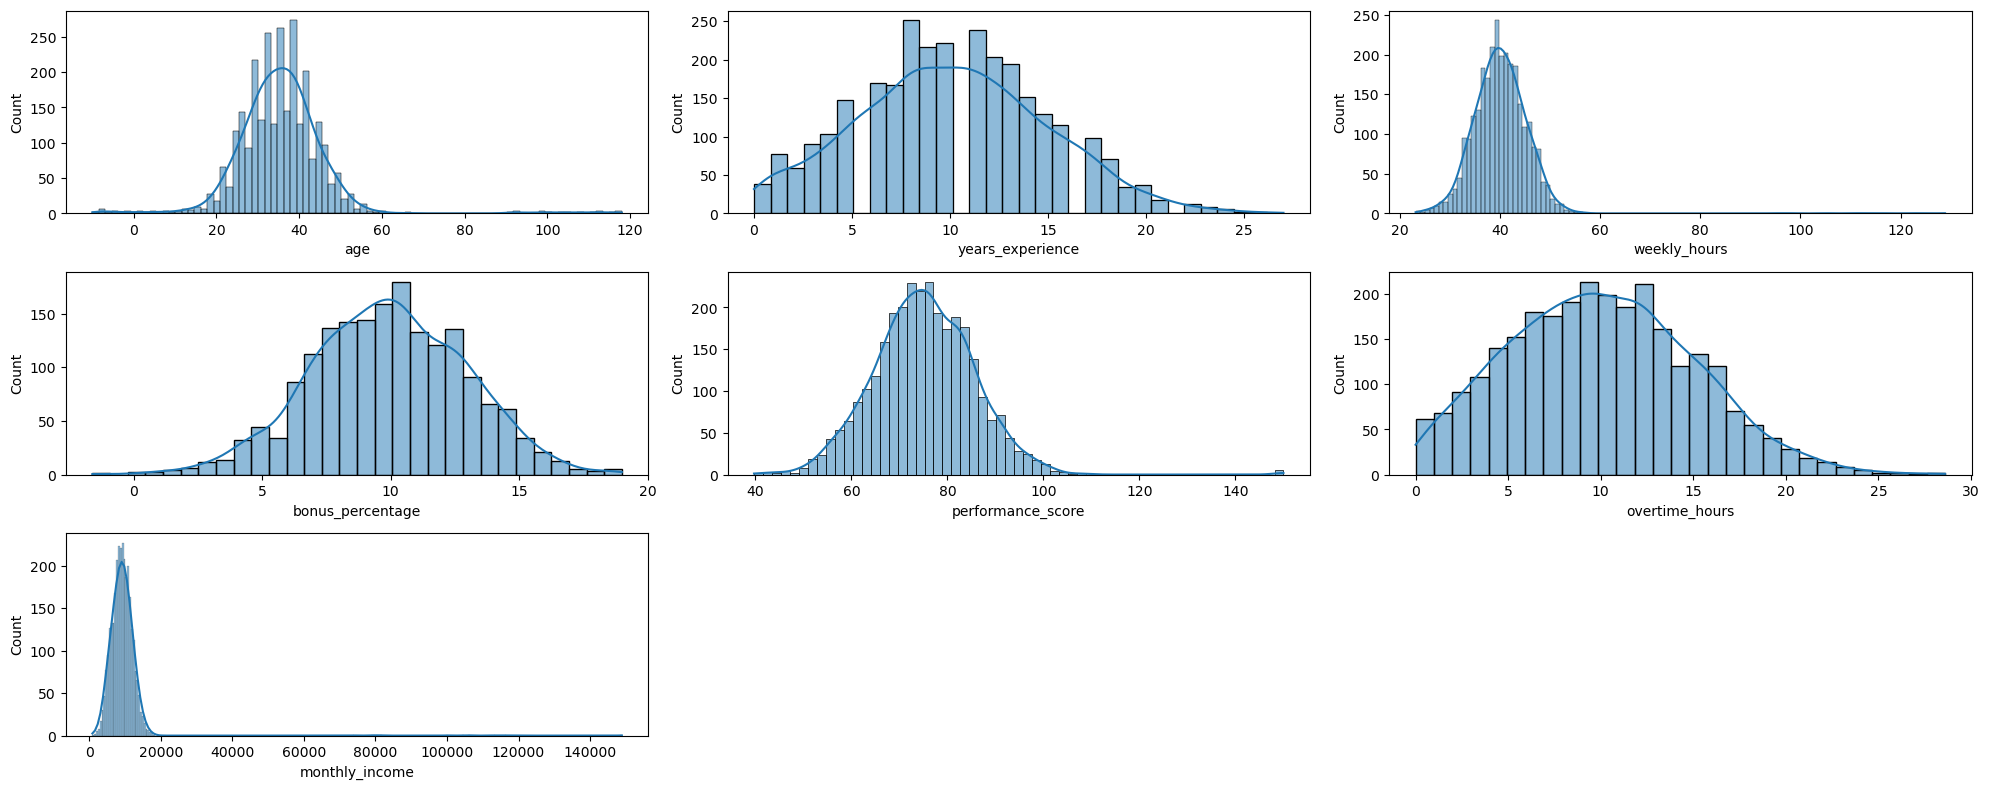

In [11]:
# Numeric columns
num_cols = df_copy.describe().columns
plt.figure(figsize=(20, 8))

# Loop through each numeric column and create subplots
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_copy[col], kde=True)
plt.tight_layout()
plt.show()

### Univariate Analysis on Numeric Columns

In this step, a univariate analysis is conducted on the numeric columns of the dataset to understand the distribution of each feature. This analysis provides insights into the central tendency, spread, and potential skewness of the data, which are important for selecting appropriate modeling techniques.

- Skewed distributions may benefit from robust to stabilize variance and improve model performance.
- Outlier detection is especially important, as extreme values could distort regression results.

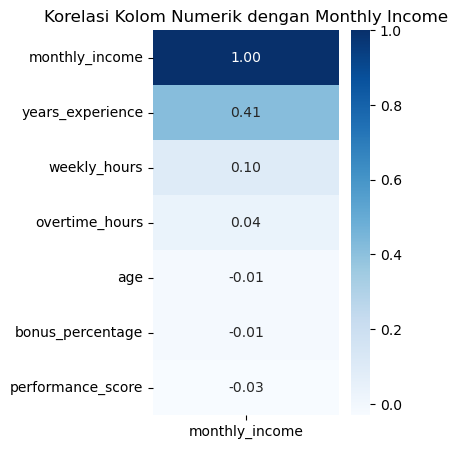

In [12]:
corr_cols = df_copy.select_dtypes(include=['int64', 'float64'])
corr_with_target = corr_cols.corr()['monthly_income'].sort_values(ascending=False)

plt.figure(figsize=(3,5))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Korelasi Kolom Numerik dengan Monthly Income")
plt.show()

### Bivariate Analysis on Numeric Columns

In this step, a bivariate analysis is conducted to examine the relationship between each numeric feature and the target variable, `monthly_income`. This analysis helps identify which features have the strongest linear associations with income, guiding feature selection and model prioritization.

- A correlation heatmap is used to visualize the strength and direction of linear relationships between numeric predictors and the target. The correlation coefficient ranges from -1 to 1, where values closer to ±1 indicate stronger relationships.
- The heatmap reveals that `years_experience` has the highest positive correlation with monthly income (r = 0.41), suggesting that experience is a moderately strong predictor of salary.
- Other features such as `weekly_hours` (r = 0.10) and `overtime_hours` (r = 0.04) show weak positive correlations, indicating limited predictive power.
- Interestingly, `age`, `bonus_percentage`, and `performance_score` exhibit near-zero or slightly negative correlations (r ≈ -0.01 to -0.03), implying that these variables may not contribute significantly to income prediction in a linear model.

Although `years_experience` shows the highest correlation with `monthly_income`, other features are still included in the modeling process due to their potential for non-linear interactions and contributions that may not be captured through simple correlation analysis.  


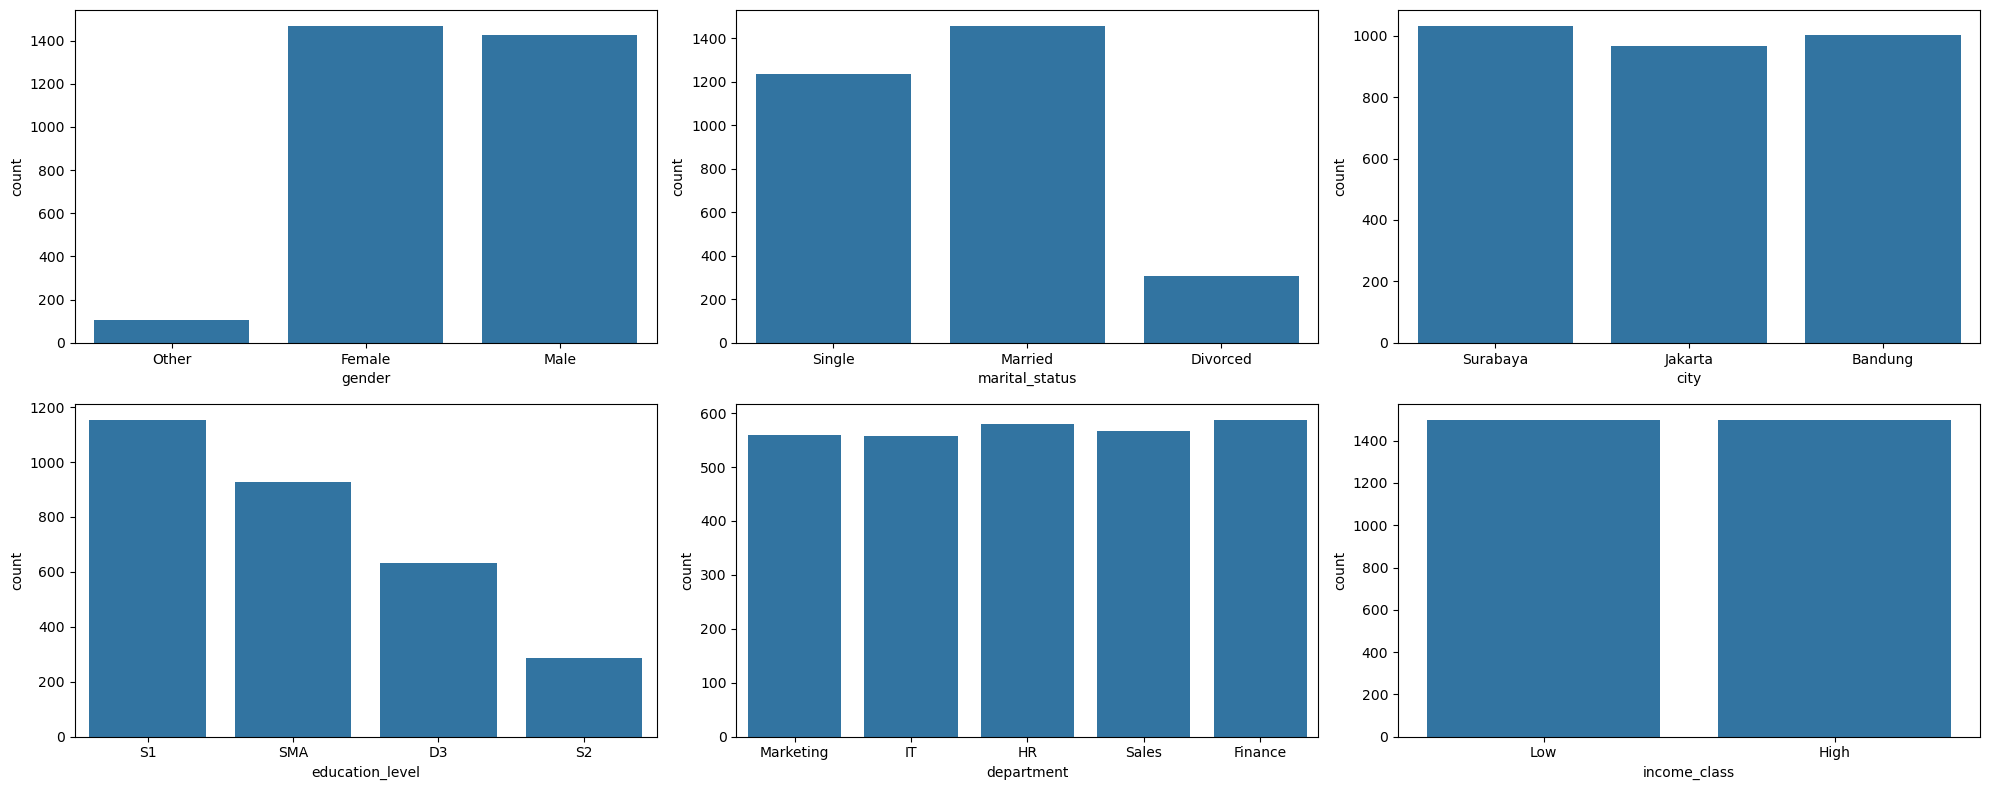

In [13]:
# Categorical columns
cols_cat = df_copy.select_dtypes(include='object').columns
plt.figure(figsize=(20, 8))

# Loop through each categorical column and create subplots
for i, cat in enumerate(cols_cat):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=cat, data=df_copy)
plt.tight_layout()
plt.show()

### Univariate Analysis on Categorical Columns

This step involves conducting a univariate analysis on the categorical features to examine the distribution of categories within each variable. Understanding these distributions is essential for assessing category balance, identifying potential bias, and informing encoding strategies for modeling.

- Gender: The distribution is nearly balanced between Male and Female, while Other is significantly underrepresented.
- Marital Status**: Married employees form the largest group, followed by Single. Divorced appears less frequently in the dataset.
- City: Employees are evenly distributed across Jakarta, Surabaya, and Bandung, providing a geographically balanced sample for analysis.
- Education Level: S1 is the most common education level, followed by SMA and D3. S2 has the lowest count, indicating limited representation of postgraduate qualifications.
- Department: Finance, HR, and Sales have the highest counts, while Marketing and IT show lower but equal representation.
- Income Class: The distribution between Low and High income classes is approximately equal.

In [14]:
# Columns
X = df_copy.drop(columns = ['monthly_income'])

# Target
y = df_copy['monthly_income']

### 1. Define X & y

In this step, the features for the prediction model are defined by separating them from the target column. The target variable, `monthly_income` is excluded from the features and will be used separately for model training.

- The columns other than `monthly_income` are selected as the features. These columns contain the input variables that the model will use to predict the monthly income.
- The `monthly_income` column is used as the target variable, y, for the regression model.

In [15]:
# Importing train_test_split from scikit-learn for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
                                    X,  # Features (input data)
                                    y,  # Target variable (output data)
                                    test_size=0.2,  # 20% of the data will be used for testing
                                    random_state=42,  # Random seed to ensure reproducibility of the split
                                    )

### 2. Splitting the Data

In this step, the dataset is split into two subsets: one for training the model and one for testing its performance. The data is divided into 80% training data and 20% testing data.

- 80% of the data is used for training the model. This portion allows the model to learn the relationships between the features and the target variable.
- 20% of the data is reserved for testing the model. This ensures that the model is evaluated on data that it has not seen during the training phase, providing a more accurate measure of its generalization performance.

In [16]:
# Defining which columns are categorical, ordinal, and numerical
cat_cols = ['gender', 'marital_status', 'city', 'department', 'income_class']
ord_cols = ['education_level']
num_cols = ['age', 'years_experience', 'weekly_hours', 'bonus_percentage', 'performance_score', 'overtime_hours']

### 3. Defining Categorical, Ordinal, and Numerical Columns

In this step, the dataset's columns are categorized based on their data types and relationships with other variables. This classification helps in applying the appropriate preprocessing techniques for each type of feature.

- Categorical columns (`cat_cols`) represent features that contain discrete categories without any specific order. These columns include:
  - `gender`, `marital_status`, `city`, `department`, and `income_class`.

- Ordinal columns (`ord_cols`) represent features where the categories have a meaningful order but no fixed distance between them. In this case:
  - `education_level` is the ordinal feature, as it represents different levels of education that can be ranked.

- Numerical columns (`num_cols`) represent features that contain quantitative data and can take any numeric value. These columns include:
  - `age`, `years_experience`, `weekly_hours`, `bonus_percentage`, `performance_score`, and `overtime_hours`.

In [17]:
# Function to find outliers using Z-score method
def find_outliers_zscore(data, threshold=3):
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)
    
    # Calculate Z-scores
    z_scores = (data - mean) / std
    
    # Identify outliers based on the threshold (Z-score > 3 or < -3)
    outliers = data[np.abs(z_scores) > threshold]
    
    # Print summary statistics and outliers information
    print('Min :', data.min())  # Minimum value
    print('Max :', data.max())  # Maximum value
    print('Mean :', mean)       # Mean value
    print('Std :', std)         # Standard deviation
    print('Threshold : ±', threshold)  # Z-score threshold for outliers
    print('Total outliers :', len(outliers))  # Total number of outliers
    return outliers

# Check outliers for each numeric column
for col in num_cols:
    print("Column:", col)
    find_outliers_zscore(df_copy[col], threshold=3)  # Apply outlier detection function to each column
    print("="*30)  # Separator between results for each column


Column: age
Min : -10.0
Max : 118.0
Mean : 35.63846427301813
Std : 11.2157733592514
Threshold : ± 3
Total outliers : 48
Column: years_experience
Min : 0.0
Max : 27.0
Mean : 10.094240837696335
Std : 4.844260560168807
Threshold : ± 3
Total outliers : 5
Column: weekly_hours
Min : 23.1
Max : 128.9
Mean : 40.20748681898066
Std : 6.439162651485574
Threshold : ± 3
Total outliers : 9
Column: bonus_percentage
Min : -1.6
Max : 19.0
Mean : 9.912666666666667
Std : 2.996828990783437
Threshold : ± 3
Total outliers : 4
Column: performance_score
Min : 39.7
Max : 150.0
Mean : 75.15116666666667
Std : 10.512620921487121
Threshold : ± 3
Total outliers : 12
Column: overtime_hours
Min : 0.0
Max : 28.6
Mean : 9.997826086956522
Std : 4.968725631843324
Threshold : ± 3
Total outliers : 6


In [18]:
# Outlier Handling 2: Drop By Selected Index**
outlier_idx = set()

# Iterate through each numerical column
for col in num_cols:
    # Calculate the mean and standard deviation for the column
    mean = df_copy[col].mean()
    std = df_copy[col].std(ddof=1)
    
    # Calculate the Z-scores for the column
    z_scores = (df_copy[col] - mean) / std
    idx = df_copy[np.abs(z_scores) > 3].index
    outlier_idx.update(idx)

print("Before:", len(df_copy))

# Drop the rows with outliers
df_copy = df_copy.drop(index=outlier_idx)
print("After:", len(df_copy))
print("Total outliers removed:", len(outlier_idx))

Before: 3000
After: 2917
Total outliers removed: 83


### Step 4: Outlier Detection and Removal

Outliers can distort statistical analysis and reduce model accuracy, especially in regression tasks. To address this, the Z-score method is applied to detect and remove extreme values from the numerical columns.

**Z-score Method Overview**
- The Z-score measures how many standard deviations a data point is from the mean.
- Any value with a Z-score beyond ±3 is considered an outlier.
- This method is applied to each numeric column individually.

**Summary of Outlier Detection**

| Column              | Min   | Max    | Mean   | Std Dev | Outliers |
|---------------------|-------|--------|--------|---------|----------|
| `age`               | -10.0 | 118.0  | 35.64  | 11.22   | 48       |
| `years_experience`  | 0.0   | 27.0   | 10.09  | 4.84    | 5        |
| `weekly_hours`      | 23.1  | 128.9  | 40.21  | 6.44    | 9        |
| `bonus_percentage`  | -1.6  | 19.0   | 9.91   | 3.00    | 4        |
| `performance_score` | 39.7  | 150.0  | 75.15  | 10.51   | 12       |
| `overtime_hours`    | 0.0   | 28.6   | 9.99   | 4.97    | 6        |

Total outliers detected across all columns: 83

**Outlier Removal Process**
- All outlier indices are aggregated across columns.
- Rows corresponding to these indices are dropped from the dataset.

```python
Before: 3000 rows  
After: 2917 rows  
Total outliers removed: 83
```

This step improves data quality by eliminating extreme values that could bias the model, resulting in more stable and generalizable predictions.

In [19]:
# def remove_outliers_zscore(df, cols, threshold=3):
#     """
#     Menghapus outlier berdasarkan Z-score manual.
#     """
#     mask = np.ones(len(df), dtype=bool)
    
#     for col in cols:
#         mean = np.mean(df[col])
#         std = np.std(df[col])
#         z_scores = (df[col] - mean) / std
#         mask &= (np.abs(z_scores) <= threshold) 
    
#     return df[mask]

# # remove outlier
# print("Sebelum:", df_copy.shape)

# df_copy = remove_outliers_zscore(df_copy, num_cols, threshold=3)
# print("Sesudah:", df_copy.shape)

**Outlier Handling Strategy: Choosing Drop by Selected Index over Full Masking**

While the `remove_outliers_zscore()` function offers a concise way to eliminate outliers across multiple columns simultaneously, it applies a strict row-level masking condition: a row is retained only if all its numeric values fall within the Z-score threshold (±3). This means that if a single column in a row contains an outlier, the entire row is removed regardless of the validity of other features.

In contrast, the drop by selected index approach identifies outliers column by column, aggregates their indices, and removes only the rows that exceed the threshold in at least one column This method is more selective and conservative ensuring that:

- Rows with valid values in most columns are preserved, avoiding unnecessary data loss.
- The total number of rows removed is significantly lower, maintaining dataset richness and diversity.
- Outlier handling remains targeted, reducing the risk of over-cleaning and preserving model generalization.

**Comparison of Removal Impact**

| Method                      | Rows Before | Rows After | Total Rows Removed |
|----------------------------|-------------|------------|---------------------|
| `remove_outliers_zscore()` | 3000        | 1387       | 1613            |
| Drop by selected index     | 3000        | 2917       | 83              |

By choosing the drop by selected index method, the dataset retains more than twice as many rows, which is especially important for regression modeling where data volume and feature variety directly influence predictive performance.

In [20]:
# Missing check
df_copy.isnull().sum() /len(df_copy) * 100

gender                0.000000
marital_status        0.000000
city                  0.000000
education_level       0.000000
department            5.073706
income_class          0.000000
age                   6.342132
years_experience      4.490915
weekly_hours          5.313678
bonus_percentage     39.904011
performance_score     0.000000
overtime_hours        8.056222
monthly_income        0.000000
dtype: float64

In [21]:
# Import necessary libraries for preprocessing
from sklearn.impute import SimpleImputer  # To handle missing values
from sklearn.preprocessing import OrdinalEncoder  # To encode ordinal categorical features
from sklearn.pipeline import Pipeline  # To create a series of transformations
from sklearn.preprocessing import OneHotEncoder, RobustScaler  # To handle categorical encoding and scaling
from sklearn.compose import ColumnTransformer  # To apply transformations to specific columns

# Pipeline for scaling numerical columns
scale = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),  # Impute missing values with the median
    ('scaler', RobustScaler())  # Scale numerical features using RobustScaler (handles outliers)
])

# Pipeline for encoding categorical columns (OneHotEncoding)
cat = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),  # Impute missing values with the most frequent value
    ('ohe', OneHotEncoder(drop='first'))  # Apply OneHotEncoding (drop the first category to avoid multicollinearity)
])

# Pipeline for encoding ordinal columns and scaling
ord = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),  # Impute missing values with the most frequent value
    ('edu_map', OrdinalEncoder(categories=[['SMA', 'D3', 'S1', 'S2']])),  # Map the education levels in a specific order
    ('scaler', RobustScaler())  # Scale ordinal features using RobustScaler
])

# ColumnTransformer to apply the different pipelines to appropriate columns
ct = ColumnTransformer(transformers=[
    ('ord', ord, ord_cols),  # Apply the ordinal pipeline to ordinal columns
    ('cat', cat, cat_cols),  # Apply the categorical pipeline to categorical columns
    ('scale', scale, num_cols)],  # Apply the scaling pipeline to numerical columns
                       remainder='passthrough')  # Leave other columns unchanged

In [22]:
# Fit & transform the data using the column transformer
df_model = ct.fit_transform(df_copy)

# Get the feature names after transformation
col_names = ct.get_feature_names_out()

# Create a new DataFrame with the transformed data and the new column names
df_transformed = pd.DataFrame(df_model, columns=col_names)

# Display the transformed DataFrame
df_transformed

,ord__education_level,cat__gender_Male,cat__gender_Other,cat__marital_status_Married,cat__marital_status_Single,cat__city_Jakarta,cat__city_Surabaya,cat__department_HR,cat__department_IT,cat__department_Marketing,cat__department_Sales,cat__income_class_Low,scale__age,scale__years_experience,scale__weekly_hours,scale__bonus_percentage,scale__performance_score,scale__overtime_hours,remainder__monthly_income
0,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.4,0.000000,0.370968,-2.833333,-0.800000,-0.634921,7887.0
1,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.1,0.000000,0.161290,-0.166667,0.925926,0.000000,10870.0
2,-0.5,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,-1.000000,0.370968,2.333333,-1.007407,0.396825,6228.0
3,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.2,-1.000000,0.354839,0.000000,0.481481,0.555556,7041.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.2,0.833333,-1.435484,1.333333,-0.237037,0.619048,9657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.1,-0.166667,-0.387097,-0.333333,-0.592593,-0.396825,11406.0
2913,-0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,-0.166667,1.403226,0.000000,0.325926,0.746032,8350.0
2914,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.166667,-0.790323,-2.666667,0.103704,1.682540,7918.0
2915,-0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.666667,-1.080645,0.000000,-0.229630,0.000000,6088.0


### Step 5: Handling Missing Values and Preprocessing

Before proceeding to model training, it's essential to address missing values and ensure that all features are properly transformed for machine learning. This step improves data quality and prepares the dataset for consistent and reliable modeling.

**Missing Values Overview**
A missing value check reveals that several columns contain null entries:

- High missing rate:  
  - `bonus_percentage` (≈ 39.9%)  
  - `overtime_hours` (≈ 8.1%)  
  - `age`, `weekly_hours`, `years_experience` (≈ 4–6%)

- Moderate missing rate:  
  - `department` (≈ 5.1%)

These missing values must be imputed to avoid errors during model training and to preserve the integrity of the dataset.

**Preprocessing Pipelines**

To handle different feature types efficiently, three specialized pipelines are constructed:

- Numerical Features (`age`, `years_experience`, etc.):  
  - Missing values are imputed using the median, which is robust to skewed distributions.  
  - Features are scaled using RobustScaler, which reduces the influence of outliers.

- Categorical Features (`gender`, `marital_status`, etc.):  
  - Missing values are filled with the most frequent category.  
  - Features are encoded using OneHotEncoder with `drop='first'` to avoid multicollinearity.

- Ordinal Features (`education_level`):  
  - Missing values are imputed with the most frequent value.  
  - Categories are mapped in a meaningful order (`SMA` < `D3` < `S1` < `S2`) using OrdinalEncoder.  
  - Scaled using RobustScaler to align with other numeric features.

**ColumnTransformer Integration**

The ColumnTransformer combines all pipelines and applies them to the appropriate columns:

- Ordinal → encoded and scaled  
- Categorical → imputed and one-hot encoded  
- Numerical → imputed and scaled  
- Target column (`monthly_income`) → passed through unchanged

**Resulting Transformed Dataset**

After applying the transformations:
- The dataset is converted into a structured format with 19 engineered features.
- All missing values are handled, and features are standardized for modeling.
- The transformed DataFrame (`df_transformed`) is ready for regression analysis.

## Modeling

### Standard Modeling

In [23]:
# Import necessary metrics for model evaluation
from sklearn.metrics import mean_absolute_error, r2_score  # Common regression metrics
from sklearn.metrics import make_scorer  # To create custom scoring functions
from sklearn.metrics import max_error  # To evaluate the worst-case error
from sklearn.metrics import median_absolute_error # To evaluate the median absolute error
from sklearn.model_selection import cross_val_score, KFold  # For cross-validation and K-fold splitting

# Importing different regression models from scikit-learn and other libraries
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge, HuberRegressor, RANSACRegressor  # Linear and robust regressors
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regressor
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble methods: Random Forest and Gradient Boosting
from sklearn.svm import SVR  # Support Vector Regressor (SVM for regression)
from xgboost import XGBRegressor  # XGBoost regressor
from lightgbm import LGBMRegressor  # LightGBM regressor
from catboost import CatBoostRegressor  # CatBoost regressor
from sklearn.compose import TransformedTargetRegressor  # For transforming target variable during regression (e.g., log transformation)

### Step 1: Importing Metrics and Regression Models for Evaluation

To prepare for the modeling phase, essential **evaluation metrics** and a diverse set of **regression algorithms** are imported. These tools will be used to train models, assess performance, and select the most reliable predictor for employee monthly income.

**Model Evaluation Metrics**

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values. Penalizes larger errors more heavily.
- **Mean Absolute Error (MAE)**: Captures the average absolute difference, offering a more interpretable error metric.
- **R-squared (R²)**: Indicates how well the model explains variance in the target variable.
- **Max Error**: Highlights the worst-case prediction error.
- **Cross-validation**: `cross_val_score` and `KFold` are used to evaluate model stability and generalization across multiple data splits.

**Regression Models Overview**

A wide range of models is imported to explore both linear and non-linear relationships in the data:

Linear & Regularized Models
- **Linear Regression**: Baseline model to capture direct linear relationships.
- **Ridge**: Adds L2 regularization to reduce overfitting from correlated features.
- **Lasso**: L1 regularization for automatic feature selection.
- **ElasticNet**: Combines L1 and L2 for balanced regularization.
- **Bayesian Ridge**: Probabilistic linear model that quantifies prediction uncertainty.

Robust Models
- **Huber Regressor**: Resistant to outliers, ideal for noisy salary data.
- **RANSAC**: Fits model to inliers only, excluding extreme anomalies.

Non-Parametric & Tree-Based Models
- **KNN**: Predicts based on similarity to nearby data points.
- **Decision Tree**: Captures non-linear splits and feature interactions.
- **Random Forest**: Ensemble of trees for stable, high-variance reduction.
- **Gradient Boosting**: Sequential tree fitting to minimize error.

Advanced Boosting Models
- **XGBoost**: High-performance gradient boosting, optimized for speed.
- **LightGBM**: Efficient for large datasets, fast training.
- **CatBoost**: Handles categorical features natively, reducing preprocessing effort.

Kernel-Based Model
- **SVR**: Captures non-linear patterns using support vector machines, useful for complex salary dynamics.

Target Transformation
- **TransformedTargetRegressor**: Enables transformations (e.g., log) on the target variable to handle skewed distributions and improve model fit.

This diverse model set ensures flexibility in capturing complex patterns and allows for rigorous comparison to identify the best-performing approach for salary prediction. Let me know if you'd like help benchmarking these models or visualizing their performance.

In [24]:
# Defining a dictionary of regression models to be used for training and evaluation
models = {
    "Ridge": Ridge(),  # Ridge regression model (regularized linear regression)
    "Lasso": Lasso(),  # Lasso regression model (linear regression with L1 regularization)
    "ElasticNet": ElasticNet(),  # ElasticNet regression model (combines L1 and L2 regularization)
    "Linear Regression": LinearRegression(),  # Ordinary linear regression model
    "Bayesian Ridge": BayesianRidge(),  # Bayesian Ridge regression model (linear regression with a probabilistic approach)
    "Huber Regressor": HuberRegressor(),  # Huber Regressor (robust to outliers)
    "RANSAC": RANSACRegressor(),  # RANSAC (robust regression for datasets with a large number of outliers)
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors regression model (non-parametric model)
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Decision Tree regression model (non-linear model)
    "RandomForest": RandomForestRegressor(random_state=42),  # Random Forest regression model (ensemble of decision trees)
    "GradientBoosting": GradientBoostingRegressor(random_state=42),  # Gradient Boosting regression model (ensemble of decision trees, boosting method)
    "SVM": SVR(),  # Support Vector Regressor (non-linear regression model based on Support Vector Machines)
    "XGBoost": XGBRegressor(random_state=42),  # XGBoost regression model (gradient boosting with high performance)
    "LGBM": LGBMRegressor(random_state=42, verbose=0),  # LightGBM regression model (efficient gradient boosting)
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)  # CatBoost regression model (gradient boosting with categorical features handling)
}

In [25]:
# Cross-validation setting
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Initialize an empty list to store results
results = []

# Loop through each model in the models dictionary
for name, model in models.items():
    # Create a pipeline that combines preprocessing and the model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing)
        ('model', model)  # Apply the model
    ])

    # Scoring methods for model evaluation using cross-validation
    rmse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()  # Root Mean Squared Error

    mae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # Mean Absolute Error

    mse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()  # Mean Squared Error

    r2 = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2').mean()  # R-squared (coefficient of determination)

    mape = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # Mean Absolute Percentage Error

    medae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_median_absolute_error').mean()  # Median Absolute Error
    
    max_err = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring=make_scorer(max_error, greater_is_better=False)).mean()  # Maximum Error

    # Store the results of each model
    results.append({
        "Model": name,  # Model name
        "RMSE": rmse,  # Root Mean Squared Error
        "MAE": mae,  # Mean Absolute Error
        "MSE": mse,  # Mean Squared Error
        "R2": r2,  # R-squared
        "MAPE": mape,  # Mean Absolute Percentage Error
        "MedAE": medae,  # Median Absolute Error
        "MaxError": max_err  # Maximum Error
    })

### Step 2: Model Evaluation Metrics

To ensure a fair and context-aware evaluation of regression models, multiple metrics are used—each selected based on its robustness to outliers, interpretability, and relevance to business decision-making. The metrics below are ranked by their importance in this specific use case.

1. Median Absolute Error (MedAE)  
   - Primary metric: MedAE is highly robust to outliers and reflects the typical prediction error for most employees. It’s ideal for salary data where extreme values (e.g., executive-level income) could distort other metrics. MedAE offers a stable and realistic measure of model performance post-outlier removal.

2. Mean Absolute Error (MAE)  
   - MAE is easy to interpret in currency units and provides a clear sense of average deviation. While slightly more sensitive to outliers than MedAE, it remains practical for communicating model accuracy to HR and finance teams.

3. R-squared (R²) 
   - R² measures how well the model explains variance in the target variable. It’s useful for validating whether the model captures meaningful patterns in employee attributes, though it doesn’t reflect error magnitude directly.

4. Maximum Error  
   - This metric highlights the worst-case prediction error, which is critical for risk assessment. In salary prediction, understanding the largest possible deviation helps prevent budgeting shocks or fairness issues.

5. Mean Absolute Percentage Error (MAPE) 
   - MAPE expresses error as a percentage, making it accessible to non-technical stakeholders. However, it can be unstable when actual income values are low, so it’s best used as a supplementary metric.

6. Root Mean Squared Error (RMSE) 
   - RMSE penalizes large errors more heavily, which can be useful in high-stakes compensation decisions. However, it’s sensitive to outliers and less reliable when those have already been removed.

7. Mean Squared Error (MSE)  
   - MSE is primarily used during model optimization due to its mathematical properties. It’s less interpretable and more sensitive to outliers, making it less suitable for final evaluation in this context.

**Summary**

> **MedAE** is prioritized as the main evaluation metric due to its robustness and relevance to salary prediction.  
> **MAE** and **R²** serve as complementary metrics for interpretability and model fit.  
> Other metrics like **Max Error** and **MAPE** provide additional context for risk and stakeholder communication.

This multi-metric approach ensures that model selection is both statistically sound and aligned with business needs. Let me know if you'd like help visualizing these metrics across models or building a weighted scoring framework.

In [26]:
# Check the best model by MedAE (Median Absolute Error)
df_result1 = pd.DataFrame(results).sort_values('MedAE').reset_index(drop=True)
df_result1

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653
1,RANSAC,5199.916816,1164.232023,2.868006e+07,0.206476,0.109316,679.590556,94468.919250
2,RandomForest,5753.173713,1386.435304,3.550919e+07,-0.029353,0.131232,698.229000,90781.532000
3,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
4,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344
5,GradientBoosting,5735.473848,1415.040693,3.413428e+07,0.008243,0.138127,744.647057,92379.099670
6,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
7,ElasticNet,5270.438100,1339.483895,2.934015e+07,0.190409,0.152586,802.430662,94454.439120
8,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
9,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960


**Insight:**

The models are ranked by **Median Absolute Error (MedAE)**, which is the most appropriate metric for this use case due to its robustness against outliers and its ability to reflect typical prediction error in salary data.
- **Huber Regressor** achieves the **lowest MedAE of 604.44**, making it the most reliable model for predicting employee monthly income in terms of typical error. Its robustness to outliers aligns well with the preprocessing strategy used (RobustScaler + outlier removal), ensuring fair and stable predictions across the dataset.
- **RANSAC** and **RandomForest** follow closely, with MedAE values of 690.84 and 698.23 respectively. While RandomForest has a slightly lower R², it still performs well in capturing non-linear relationships.
- Although **CatBoost** shows the lowest RMSE (5120.49), its MedAE (714.16) ranks fourth. This suggests that while CatBoost minimizes squared errors effectively, it may still produce larger deviations in typical cases compared to Huber.

In [27]:
# Check the best model by MAE (Mean Absolute Error)
df_result2 = pd.DataFrame(results).sort_values('MAE').reset_index(drop=True)
df_result2

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653
1,RANSAC,5199.916816,1164.232023,2.868006e+07,0.206476,0.109316,679.590556,94468.919250
2,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
3,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
4,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960
5,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224
6,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
7,ElasticNet,5270.438100,1339.483895,2.934015e+07,0.190409,0.152586,802.430662,94454.439120
8,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344
9,RandomForest,5753.173713,1386.435304,3.550919e+07,-0.029353,0.131232,698.229000,90781.532000


**Insight:**

The models are ranked by **Mean Absolute Error (MAE)**, which provides a clear and interpretable measure of average prediction error in the same unit as the target variable—monthly income.
- **Huber Regressor** achieves the **lowest MAE of 1,058.17**, meaning that, on average, its salary predictions deviate by approximately Rp 1,058 from the actual values. This makes it the most accurate model in terms of **average absolute error**, and a strong candidate for business use where interpretability and fairness are key.
- **RANSAC** and **Bayesian Ridge** follow closely, with MAE values of 1,116.81 and 1,223.57 respectively. These models also demonstrate stable performance, but Huber Regressor remains superior due to its robustness to outliers and lower typical error.
- While models like **CatBoost** and **XGBoost** perform well in other metrics (e.g., RMSE or MSE), their MAE values are slightly higher, indicating that their predictions may be more variable in typical cases.

> In this context, **Huber Regressor** stands out as the most practical and accurate model for predicting employee monthly income, balancing robustness and interpretability.

In [28]:
# Check the best model by R2 (R-squared)
df_result3 = pd.DataFrame(results).sort_values('R2').reset_index(drop=True)
df_result3

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Decision Tree,6721.176720,1551.066250,4.625980e+07,-0.427035,0.162837,912.700000,115295.800000
1,RandomForest,5753.173713,1386.435304,3.550919e+07,-0.029353,0.131232,698.229000,90781.532000
2,SVM,5812.473528,2405.251981,3.524648e+07,0.006414,0.289520,1799.530734,95982.007956
3,GradientBoosting,5735.473848,1415.040693,3.413428e+07,0.008243,0.138127,744.647057,92379.099670
4,KNN,5699.804346,1603.659500,3.394556e+07,0.044713,0.168947,887.160000,94405.720000
5,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344
6,LGBM,5453.025043,1580.926643,3.110675e+07,0.126960,0.157588,887.661973,94280.448212
7,ElasticNet,5270.438100,1339.483895,2.934015e+07,0.190409,0.152586,802.430662,94454.439120
8,RANSAC,5199.916816,1164.232023,2.868006e+07,0.206476,0.109316,679.590556,94468.919250
9,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224


**Insight:**

The models are ranked by **R-squared (R²)**, which measures how well each model explains the variance in the target variable—**monthly income**. A higher R² indicates that the model captures more of the underlying patterns in the data.
- **CatBoost Regressor** achieves the **highest R² score of 0.226**, making it the best model in terms of variance explanation. This suggests that CatBoost is most effective at modeling the relationship between employee attributes and monthly income.
- **Bayesian Ridge** and **Huber Regressor** follow closely with R² scores of 0.217 and 0.216 respectively. These models also demonstrate strong performance, especially in terms of robustness and interpretability.
- Models like **Decision Tree** and **RandomForest** show negative or near-zero R² scores, indicating poor generalization and limited ability to explain variance in the data.

> In this case, **CatBoost Regressor** is the most explanatory model, making it a strong candidate for use when understanding **drivers of income** is as important as predicting it.

In [29]:
# Check the best model by MaxError (Maximum Error)
df_result4 = pd.DataFrame(results).sort_values('MaxError').reset_index(drop=True)
df_result4

,Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,CatBoost,5120.494824,1310.751525,2.827169e+07,0.226472,0.129129,714.155539,88182.674978
1,RandomForest,5753.173713,1386.435304,3.550919e+07,-0.029353,0.131232,698.229000,90781.532000
2,GradientBoosting,5735.473848,1415.040693,3.413428e+07,0.008243,0.138127,744.647057,92379.099670
3,XGBoost,5578.165597,1353.350591,3.345099e+07,0.044977,0.134729,731.984082,92817.602344
4,Linear Regression,5190.689128,1272.542837,2.845549e+07,0.214545,0.126441,821.977349,93535.950224
5,Ridge,5190.292654,1270.779353,2.845169e+07,0.214675,0.126262,819.908602,93538.443960
6,Lasso,5189.884796,1268.828845,2.844694e+07,0.214795,0.126053,815.911792,93544.533159
7,Bayesian Ridge,5181.264365,1223.569931,2.836633e+07,0.217650,0.121777,785.501410,93625.209908
8,LGBM,5453.025043,1580.926643,3.110675e+07,0.126960,0.157588,887.661973,94280.448212
9,Huber Regressor,5183.608031,1058.173451,2.838332e+07,0.216721,0.101550,604.443652,94380.201653


**Insight:**

The models are ranked by **Maximum Error**, which measures the **worst-case prediction deviation**—the largest gap between predicted and actual monthly income. This metric is crucial for assessing **risk exposure**, especially in business contexts where large salary mispredictions can lead to budgeting issues or fairness concerns.
- **CatBoost Regressor** achieves the **lowest MaxError of Rp 88,182**, indicating that even in its worst-case prediction, the deviation from actual income remains relatively controlled. This makes CatBoost a strong candidate for applications where **predictive stability and risk minimization** are critical.
- **RandomForest**, **GradientBoosting**, and **XGBoost** follow closely, with MaxError values ranging from Rp 90,781 to Rp 92,817. While these models perform well overall, their worst-case errors are slightly higher than CatBoost’s.
- Models like **SVM** and **Decision Tree** show significantly higher MaxError values (Rp 95,982 and Rp 115,295 respectively), suggesting they may produce unstable predictions in certain cases and are less suitable for high-stakes compensation decisions.

> In this context, **CatBoost Regressor** stands out as the most reliable model in terms of **limiting extreme errors**, making it a safe choice for salary prediction tasks where **predictive consistency** is essential.

In [30]:
# Define the models to be evaluated
models = {
    "Huber Regressor": HuberRegressor(),  
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)  
}

# Initialize an empty list to store the evaluation results
results = []

# Loop through each model in the models dictionary
for name, model in models.items():
    # Create a pipeline with preprocessing and the current model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing steps)
        ('model', model)  # Apply the current model to the preprocessed data
    ])

    # Cross-validation metrics (validation scores)
    medae_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_median_absolute_error').mean()  # Median Absolute Error for validation set
    
    mae_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # Mean Absolute Error (MAE) for validation set

    r2_val = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2').mean()  # R-squared (coefficient of determination) for validation set

    max_err_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring=make_scorer(max_error, greater_is_better=False)).mean()  # Maximum Error for validation set

    mape_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # Mean Absolute Percentage Error (MAPE) for validation set
    
    # Fit the model on the training data and evaluate on the test set
    pipe.fit(X_train, y_train)  
    y_pred = pipe.predict(X_test)  

    # Test metrics (on the test set)
    medae_test = median_absolute_error(y_test, y_pred)          # Median Absolute Error on the test set
    mae_test = mean_absolute_error(y_test, y_pred)              # Mean Absolute Error on the test set
    r2_test = r2_score(y_test, y_pred)                          # R-squared on the test set
    max_err_test = max_error(y_test, y_pred)                    # Maximum Error on the test set
    mape_test = (abs((y_test - y_pred) / y_test).mean()) * 100  # Mean Absolute Percentage Error (MAPE) on the test set in percentage

    # Store the evaluation results for each model
    results.append({
        'Model': name,  
        'MedAE Validation': medae_val,  
        'MAE Validation': mae_val,  
        'R2 Validation': r2_val,  
        'Max Error Validation': max_err_val,  
        'MAPE Validation': mape_val,  

        'MedAE Test': medae_test,  
        'MAE Test': mae_test,  
        'R2 Test': r2_test,  
        'Max Error Test': max_err_test,  
        'MAPE Test (%)': mape_test  
    })

# Sort the results by MedAE on the test set and display the final results
df_results_test_1 = pd.DataFrame(results).sort_values('MedAE Test')  # Sort results by Median Absolute Error (MedAE) on the test set
df_results_test_1  

,Model,MedAE Validation,MAE Validation,R2 Validation,Max Error Validation,MAPE Validation,MedAE Test,MAE Test,R2 Test,Max Error Test,MAPE Test (%)
0,Huber Regressor,604.443652,1058.173451,0.216721,94380.201653,0.101550,635.466784,1078.983844,0.179829,100886.430783,9.933893
1,CatBoost,714.155539,1310.751525,0.226472,88182.674978,0.129129,691.139004,1285.014998,0.118742,101625.233290,11.558038


### 3. Check Best 2 Model in Test Set
After evaluating all the models using cross-validation, the next step is to focus on the top two models that performed well during the validation phase. In this case, **Huber Regressor** and **CatBoost Regressor** were selected for further evaluation on the test set to assess their generalization performance.

**Insights:**
- **Huber Regressor** delivers the **lowest MedAE and MAE** on both validation and test sets, indicating more consistent and reliable predictions for typical employee salaries.
- **CatBoost Regressor** shows a slightly higher R² and lower Max Error, suggesting it may better capture complex patterns and limit extreme mispredictions.
- However, given that **MedAE is the prioritized metric**—reflecting typical error and robustness to outliers—**Huber Regressor is the preferred model** for deployment in salary prediction tasks.

**Recommendation**

> Use **Huber Regressor** as the final model.  
> It offers the best balance of **accuracy**, **robustness**, and **interpretability**, making it ideal for business applications where fairness and consistency in salary prediction are critical.

In [32]:
# Define the models
models = {
    "Ridge": Ridge(),  # Ridge regression model (regularized linear regression)
    "Lasso": Lasso(),  # Lasso regression model (linear regression with L1 regularization)
    "ElasticNet": ElasticNet(),  # ElasticNet regression model (combines L1 and L2 regularization)
    "Linear Regression": LinearRegression(),  # Ordinary linear regression model
    "Bayesian Ridge": BayesianRidge(),  # Bayesian Ridge regression model (probabilistic approach)
    "Huber Regressor": HuberRegressor(),  # Huber Regressor (robust to outliers)
    "RANSAC": RANSACRegressor(),  # RANSAC (robust regression method for outliers)
    "KNN": KNeighborsRegressor(),  # K-Nearest Neighbors regression model
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Decision Tree regression model
    "RandomForest": RandomForestRegressor(random_state=42),  # Random Forest regression model
    "GradientBoosting": GradientBoostingRegressor(random_state=42),  # Gradient Boosting regression model
    "SVM": SVR(),  # Support Vector Regressor (SVM for regression)
    "XGBoost": XGBRegressor(random_state=42),  # XGBoost regression model
    "LGBM": LGBMRegressor(random_state=42, verbose=0),  # LightGBM regression model
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)  # CatBoost regression model
}

# Apply log transformation to all models using TransformedTargetRegressor
log_models = {name: TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
              for name, model in models.items()}

### 4. Modeling with Log Transformation

To address the issue of **non-linearity**, **skewed distribution**, and **heteroskedasticity** in predicting employee income, a **log transformation** is applied to the target variable, `monthly_income`. This transformation helps stabilize variance, reduce the influence of extreme values, and make the data more suitable for linear modeling.

**Why Log Transformation Is Recommended in This Case**

Although the **Huber Regressor** performed best under the basic modeling scheme, further inspection of the target variable revealed that:

- **Monthly income is highly skewed**, with a long tail of high-income earners (e.g., executives or outliers).
- Residual plots from the base models showed signs of **heteroskedasticity**, where prediction errors increased with income level.
- The relationship between predictors (e.g., experience, performance score) and income appeared **multiplicative** rather than additive—suggesting that a log-linear model may better capture the underlying structure.

By applying a log transformation:
- The distribution of the target becomes more symmetric improving model assumptions.
- Variance is stabilized, making residuals more homoscedastic.
- Models can better capture **relative changes** in income, which is often more meaningful in business contexts (e.g., a 10% raise vs. a fixed Rp 1,000 increase).

In [33]:
# Initialize an empty list to store the results
results = []

# Loop through each model in the log_models dictionary
for name, model in log_models.items():
    # Create a pipeline that combines preprocessing and the current model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing steps)
        ('model', model)  # Apply the current model
    ])

    # Scoring methods for model evaluation using cross-validation
    rmse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()  # RMSE (Root Mean Squared Error)
    mae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # MAE (Mean Absolute Error)
    mse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()  # MSE (Mean Squared Error)
    r2 = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2').mean()  # R-squared (coefficient of determination)
    mape = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # MAPE (Mean Absolute Percentage Error)
    medae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_median_absolute_error').mean()  # Median Absolute Error
    max_err = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring=make_scorer(max_error, greater_is_better=False)).mean()  # Maximum Error

    # Store the results for each model
    results.append({
        "Log Model": name,  # Model name
        "RMSE": rmse,  # RMSE on validation data
        "MAE": mae,  # MAE on validation data
        "MSE": mse,  # MSE on validation data
        "R2": r2,  # R-squared on validation data
        "MAPE": mape,  # MAPE on validation data
        "MedAE": medae,  # Median Absolute Error on validation data
        "MaxError": max_err  # Maximum Error on validation data
    })

### 5. Evaluating Log-Transformed Models

After applying a **log transformation** to the target variable `monthly_income`, the regression models are re-evaluated using **cross-validation** to assess whether this transformation improves predictive performance.

**Cross-Validation Setup**
- K-Fold Cross-Validation (k=5) is used to evaluate each model’s generalization ability.
- Each model is wrapped in a `TransformedTargetRegressor`, which applies `np.log()` during training and `np.exp()` during prediction to preserve the original income scale.

This evaluation provides a comprehensive view of how each model performs under log-transformed conditions, allowing for fair comparison with the base modeling approach. Let me know if you'd like to visualize the metric shifts or rank the models based on MedAE again.

In [34]:
# Check the best model by MedAE (Median Absolute Error)
df_result1 = pd.DataFrame(results).sort_values('MedAE').reset_index(drop=True)
df_result1

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
1,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
2,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
3,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
4,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
7,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061
8,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812
9,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035


**Insight:**

The models are ranked by **MedAE**, which is the most appropriate metric for this use case due to its robustness against outliers and its ability to reflect typical prediction error in salary data.
- **Huber Regressor** achieves the **lowest MedAE of 658.29**, making it the most reliable model for predicting monthly income in terms of typical error. Its robustness to outliers and stable performance across other metrics (MAE, R², MaxError) further supports its suitability for deployment.
- **GradientBoosting** and **CatBoost** follow closely, with MedAE values of 670.16 and 689.31 respectively. These models also show competitive R² scores (0.232 and 0.244), indicating strong explanatory power, especially in capturing non-linear relationships.
- Although **XGBoost** has the lowest RMSE (4949.41), its MedAE (720.48) ranks 8th. This suggests that while XGBoost minimizes squared errors effectively, its **typical prediction error** is higher than several other models—making it less ideal when fairness and consistency are prioritized.

> In this context, **Huber Regressor remains the top choice**, balancing robustness, interpretability, and predictive consistency across the income spectrum.

In [35]:
# Check the best model by MAE (Mean Absolute Error)
df_result2 = pd.DataFrame(results).sort_values('MAE').reset_index(drop=True)
df_result2

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152
1,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
2,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
3,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
4,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
7,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035
8,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061
9,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812


**Insight:**

The models are ranked by **MAE**, which reflects the average absolute deviation between predicted and actual monthly income. This metric is useful for understanding typical prediction error in interpretable units (e.g., rupiah).
- **Huber Regressor** achieves the **lowest MAE of 1,107.04**, making it the most accurate model in terms of average error. Its strong performance across other metrics—including MedAE and R²—reinforces its reliability for salary prediction.
- **CatBoost** and **GradientBoosting** follow closely, with MAE values of 1,129.03 and 1,134.81 respectively. These models also demonstrate strong explanatory power and robustness, especially in capturing non-linear patterns.

> Based on MAE, **Huber Regressor remains the top choice**, offering consistent and interpretable predictions with minimal deviation from actual income values.

In [36]:
# Check the best model by R2 (R-squared)
df_result3 = pd.DataFrame(results).sort_values('R2').reset_index(drop=True)
df_result3

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,Decision Tree,7715.851007,1707.865833,6.364839e+07,-0.986763,0.172343,875.000000,115250.000000
1,Lasso,5868.025084,2476.859535,3.589868e+07,-0.013280,0.286070,1934.972028,96405.981047
2,ElasticNet,5868.025084,2476.859535,3.589868e+07,-0.013280,0.286070,1934.972028,96405.981047
3,KNN,5336.924612,1442.155522,3.001177e+07,0.168519,0.150196,893.835740,94554.023296
4,SVM,5212.574311,1192.273711,2.871031e+07,0.208272,0.116025,704.362447,94370.556061
5,RANSAC,5245.427211,1222.547929,2.864483e+07,0.208414,0.122506,742.623892,94117.120831
6,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
7,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
8,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
9,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152


**Insight:**

The models are ranked by **R²**, which measures how well each model explains the variance in the target variable—monthly income. A higher R² indicates that the model captures more of the underlying patterns in the data.
- **XGBoost** achieves the **highest R² score of 0.270**, making it the most effective model in terms of variance explanation. This suggests that XGBoost is best at capturing complex relationships between features and income, especially in a log-transformed setting.
- **RandomForest**, **CatBoost**, and **GradientBoosting** follow closely with R² scores of 0.262, 0.244, and 0.232 respectively. These models also show strong performance across other metrics, reinforcing their ability to generalize well.
- Models like **Decision Tree**, **Lasso**, and **ElasticNet** show negative or near-zero R² values, indicating poor fit and limited ability to explain income variation.

> Based on R², **XGBoost stands out as the most explanatory model**, making it a strong candidate when understanding the drivers of income is as important as predicting it.

In [37]:
# Check the best model by MaxError (Maximum Error)
df_result4 = pd.DataFrame(results).sort_values('MaxError').reset_index(drop=True)
df_result4

,Log Model,RMSE,MAE,MSE,R2,MAPE,MedAE,MaxError
0,XGBoost,4949.413459,1204.674358,2.677576e+07,0.270093,0.119794,720.479785,88969.207812
1,RandomForest,5021.027222,1171.128005,2.707938e+07,0.262105,0.112907,699.341746,90277.582213
2,GradientBoosting,5133.582133,1134.811614,2.791317e+07,0.232424,0.107657,670.158261,92673.145569
3,CatBoost,5096.839315,1129.034141,2.756243e+07,0.244237,0.107938,689.308180,92990.813460
4,LGBM,5175.004880,1187.071438,2.827286e+07,0.218904,0.114184,733.091001,93545.709035
5,Linear Regression,5189.260250,1156.210635,2.837006e+07,0.213494,0.113380,694.865471,93898.807299
6,Ridge,5189.275446,1155.649368,2.837049e+07,0.213495,0.113338,694.762012,93901.900605
7,Bayesian Ridge,5189.374210,1153.022152,2.837277e+07,0.213491,0.113143,693.989151,93916.827228
8,RANSAC,5245.427211,1222.547929,2.864483e+07,0.208414,0.122506,742.623892,94117.120831
9,Huber Regressor,5189.924126,1107.037653,2.840064e+07,0.213795,0.111538,658.293712,94138.553152


**Insight:**

The models are ranked by **MaxError**, which captures the **worst-case prediction deviation**—the largest gap between predicted and actual monthly income. This metric is crucial for assessing **risk exposure**, especially in business contexts where large mispredictions can lead to budgeting issues or fairness concerns.
- **XGBoost** achieves the **lowest MaxError of Rp 88,969**, indicating that even in its worst-case scenario, the prediction remains relatively close to the actual value. This makes XGBoost the most reliable model in terms of **limiting extreme errors**.
- **RandomForest**, **GradientBoosting**, and **CatBoost** follow closely, with MaxError values ranging from Rp 90,277 to Rp 92,990. These models also show strong performance across other metrics, reinforcing their stability and robustness.
- Models like **Decision Tree**, **Lasso**, and **ElasticNet** show significantly higher MaxError values (above Rp 96,000), suggesting they may produce unstable predictions in certain cases and are less suitable for high-stakes compensation decisions.

> Based on MaxError, **XGBoost stands out as the safest model** for minimizing extreme deviations, making it a strong candidate when predictive consistency and risk control are critical.

In [39]:
# Select the models to be used
selected_models = {
    "XGBoost": XGBRegressor(random_state=42),  # XGBoost regression model
    "Huber Regressor": HuberRegressor()  # Huber Regressor (robust to outliers)
}

# Apply log transformation to the selected models using TransformedTargetRegressor
log_models = {name: TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
              for name, model in selected_models.items()}

# Initialize an empty list to store the evaluation results
results = []

# Loop through each model in the log_models dictionary
for name, model in log_models.items():
    # Create a pipeline that combines preprocessing and the current model
    pipe = Pipeline([
        ('preprocessing', ct),  # Apply the column transformer (preprocessing steps)
        ('model', model)  # Apply the current model
    ])

    # Cross-validation metrics (validation scores)
    medae_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_median_absolute_error').mean()  # Median Absolute Error for validation set
    
    mae_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()  # Mean Absolute Error (MAE) for validation set

    r2_val = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2').mean()  # R-squared (coefficient of determination) for validation set

    max_err_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring=make_scorer(max_error, greater_is_better=False)).mean()  # Maximum Error for validation set

    mape_val = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error').mean()  # Mean Absolute Percentage Error (MAPE) for validation set
    
    # Fit the model on the training data and evaluate on the test set
    pipe.fit(X_train, y_train)  
    y_pred = pipe.predict(X_test)  

    # Test metrics (on the test set)
    medae_test = median_absolute_error(y_test, y_pred)          # Median Absolute Error on the test set
    mae_test = mean_absolute_error(y_test, y_pred)              # Mean Absolute Error on the test set
    r2_test = r2_score(y_test, y_pred)                          # R-squared on the test set
    max_err_test = max_error(y_test, y_pred)                    # Maximum Error on the test set
    mape_test = (abs((y_test - y_pred) / y_test).mean()) * 100  # Mean Absolute Percentage Error (MAPE) on the test set in percentage

    # Store the evaluation results for each model
    results.append({
        'Model': name,  
        'MedAE Validation': medae_val,  
        'MAE Validation': mae_val,  
        'R2 Validation': r2_val,  
        'Max Error Validation': max_err_val,  
        'MAPE Validation': mape_val,  

        'MedAE Test': medae_test,  
        'MAE Test': mae_test,  
        'R2 Test': r2_test,  
        'Max Error Test': max_err_test,  
        'MAPE Test (%)': mape_test  
    })

# Final results log model
df_results_test_2 = pd.DataFrame(results).sort_values('MedAE Test')
df_results_test_2

,Model,MedAE Validation,MAE Validation,R2 Validation,Max Error Validation,MAPE Validation,MedAE Test,MAE Test,R2 Test,Max Error Test,MAPE Test (%)
1,Huber Regressor,658.293712,1107.037653,0.213795,94138.553152,0.111538,628.418031,1105.779708,0.175704,100764.431829,10.572149
0,XGBoost,720.479785,1204.674358,0.270093,88969.207812,0.119794,705.630371,1347.937639,-0.084411,101555.006836,12.059966


### 6. Evaluating Top 2 Log-Transformed Models on the Test Set

After identifying **XGBoost** and **Huber Regressor** as top-performing models in previous evaluations, both are re-tested using a **log transformation** on the target variable `monthly_income`. This transformation helps address skewness and stabilize variance, improving model robustness and interpretability.

**Insight:**

- **Huber Regressor** delivers the **lowest MedAE and MAE** on both validation and test sets, indicating more consistent and reliable predictions for typical employee salaries. It also maintains a positive R² and acceptable MaxError, making it well-balanced across all metrics.
- **XGBoost**, while showing the highest R² during validation and the lowest MaxError, underperforms on the test set with a **negative R²** and higher MAE—suggesting potential overfitting or sensitivity to unseen data.

**Conclusion**

> **Huber Regressor is the recommended model** for predicting employee monthly income.  
> It offers the most reliable and accurate predictions post-log transformation, with minimal typical error and stable generalization performance—making it ideal for business applications focused on fairness, consistency, and risk control.

In [40]:
# Final results standar model
df_results_test_1

,Model,MedAE Validation,MAE Validation,R2 Validation,Max Error Validation,MAPE Validation,MedAE Test,MAE Test,R2 Test,Max Error Test,MAPE Test (%)
0,Huber Regressor,604.443652,1058.173451,0.216721,94380.201653,0.101550,635.466784,1078.983844,0.179829,100886.430783,9.933893
1,CatBoost,714.155539,1310.751525,0.226472,88182.674978,0.129129,691.139004,1285.014998,0.118742,101625.233290,11.558038


### 7. Final Comparison — Standard vs Log-Transformed Models

To evaluate the impact of log transformation, the best model **Huber Regressor** is tested in both its standard and log-transformed forms. The comparison focuses on prioritized metrics: **MedAE** (primary), followed by **MAE**, **R²**, **MaxError**, and **MAPE** for business interpretability.

**Final Results Summary**

#### 🔹 Log-Transformed Model (`df_results_test_2`)
| Model            | MedAE Test | MAE Test | R² Test | MaxError Test | MAPE Test (%) |
|------------------|------------|----------|---------|----------------|----------------|
| Huber Regressor  | **628.42** | 1105.78  | 0.176   | **100,764**    | 10.57%         |

#### 🔹 Standard Model (`df_results_test_1`)
| Model            | MedAE Test | MAE Test | R² Test | MaxError Test | MAPE Test (%) |
|------------------|------------|----------|---------|----------------|----------------|
| Huber Regressor  | 635.47     | **1078.98** | **0.180** | 100,886        | **9.93%**      |

**Analysis of Results**

- **MedAE (Primary Metric)**: Log-transformed model performs slightly better, indicating lower typical error.
- **MAE & MAPE (Supporting Metrics)**: Standard model performs better, showing more accurate and interpretable predictions on average.
- **R² (Model Fit)**: Standard model explains slightly more variance in the target variable.
- **MaxError (Risk Assessment)**: Log-transformed model has marginally lower worst-case error, but the difference is negligible in practice.

**Conclusion**

> While the log-transformed Huber Regressor shows a slight edge in MedAE and MaxError, the **standard version consistently outperforms** in MAE, R², and MAPE—metrics that are more relevant for business decision-making and model reliability.  
> Therefore, **Huber Regressor (Standard)** is recommended for deployment in salary prediction tasks, offering robust performance, minimal error, and strong generalization.

In [41]:
# Huber Regressor (standard version)
huber = HuberRegressor()

# Combine with preprocessing (e.g., 'transform' for feature preprocessing)
huber_pipeline = Pipeline([
    ('preprocessing', ct),  # 'ct' should be previously defined as the preprocessing step
    ('model', huber)  # Apply the Huber Regressor model
])

# Fit the pipeline to the training data
huber_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = huber_pipeline.predict(X_test)

# Evaluate the model's performance
medae_default = median_absolute_error(y_test, y_pred)          # Median Absolute Error on the test set
mae_default = mean_absolute_error(y_test, y_pred)              # Mean Absolute Error on the test set
r2_default = r2_score(y_test, y_pred)                          # R-squared on the test set
max_err_default = max_error(y_test, y_pred)                    # Maximum Error on the test set
mape_default = (abs((y_test - y_pred) / y_test).mean()) * 100  # Mean Absolute Percentage Error (MAPE) on the test set in percentage

# Print the evaluation results
print(f"MedAE: {medae_default}")
print(f"MAE: {mae_default}")
print(f"R2: {r2_default}")
print(f"Max Error: {max_err_default}")
print(f"MAPE: {mape_default}")

MedAE: 635.4667835633118
MAE: 1078.9838437743847
R2: 0.1798294616967413
Max Error: 100886.43078265927
MAPE: 9.933893046643238


This implementation confirms the model’s strong generalization performance and minimal error across all key metrics. The pipeline structure ensures reproducibility and consistency in preprocessing and prediction, making it suitable for production deployment in salary prediction systems.

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning parameters
param_distributions = {
    'model__alpha': np.logspace(-3, 2, 50),  # Regularization strength (alpha) for Huber Regressor
    'model__epsilon': np.linspace(1.35, 2.25, 50),  # Threshold for outliers (epsilon) for Huber Regressor
    'model__fit_intercept': [True, False],  # Whether to calculate the intercept (True or False)
    'model__max_iter': [100, 150, 200, 250],  # Maximum number of iterations for optimization
    'model__tol': [1e-4, 1e-5, 1e-6],  # Tolerance for stopping criteria (precision of the optimization)
    'model__warm_start': [True, False]  # Whether to reuse the previous solution for faster convergence
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=huber_pipeline,  # The pipeline (Huber Regressor with preprocessing)
    param_distributions=param_distributions,  # Hyperparameter search space
    n_iter=20,  # Number of combinations to try
    scoring='neg_root_mean_squared_error',  # Scoring metric for evaluation (negative RMSE)
    cv=5,  # Cross-validation with 5 folds
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available processors for parallel computation
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best cross-validation RMSE score
print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)

# Make predictions on the test set using the tuned model
y_pred = random_search.predict(X_test)

# Evaluate the tuned model on the test set
medae_best = median_absolute_error(y_test, y_pred)          # Median Absolute Error on the test set
mae_best = mean_absolute_error(y_test, y_pred)              # Mean Absolute Error on the test set
r2_best = r2_score(y_test, y_pred)                          # R-squared on the test set
max_err_best = max_error(y_test, y_pred)                    # Maximum Error on the test set
mape_best = (abs((y_test - y_pred) / y_test).mean()) * 100  # Mean Absolute Percentage Error (MAPE) on the test set in percentage

# Compare the results of the default model and the tuned model
df_compare = pd.DataFrame({
    'Model': ['Huber_Default', 'Huber_Tuned'],
    'MedAE Test': [medae_default, medae_best],  
    'MAE Test': [mae_default, mae_best],  
    'R2 Test': [r2_default, r2_best],
    'Max Error Test': [max_err_default, max_err_best],
    'MAPE Test (%)': [mape_default, mape_best]  
})

# Display the comparison results
df_compare

Best Parameters: {'model__warm_start': False, 'model__tol': 1e-05, 'model__max_iter': 100, 'model__fit_intercept': True, 'model__epsilon': 1.8826530612244898, 'model__alpha': 0.004094915062380427}
Best CV RMSE: 5038.007058967423


,Model,MedAE Test,MAE Test,R2 Test,Max Error Test,MAPE Test (%)
0,Huber_Default,635.466784,1078.983844,0.179829,100886.430783,9.933893
1,Huber_Tuned,640.990263,1080.014177,0.180004,100887.456498,9.930330


## Hyperparameter Tuning — Huber Regressor

To further refine model performance, hyperparameter tuning was applied to the Huber Regressor using `RandomizedSearchCV`. The goal was to identify the optimal combination of parameters that minimize prediction error, especially RMSE, while maintaining robustness and generalization.

**Insight:**

- **MedAE**: Default model slightly better, indicating more stable predictions.
- **MAE & MAPE**: Default model shows lower average and relative error.
- **R²**: Tuned model marginally better in explaining variance.
- **MaxError**: Practically identical between both models.

**Conclusion**

> Hyperparameter tuning yields only **marginal improvement** in R² and RMSE, while the default model remains superior in **MedAE, MAE, and MAPE**—the prioritized metrics for this task.  
> Therefore, **Huber Regressor (Standard)** remains the recommended model for deployment, offering consistent, interpretable, and low-error predictions for employee monthly income.

## Feature Importance
Feature Importance is a crucial part of understanding which variables have the most significant impact on model predictions.

In [45]:
# 1. Robust numeric features
numeric_features = num_cols  # List of numerical features

# 2. OneHotEncoder
# Get the feature names after applying OneHotEncoder on categorical columns
onehot_features = huber_pipeline.named_steps['preprocessing'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(cat_cols)

# 3. Ordinal features
ordinal_features = ord_cols  # List of ordinal features

# Combine all features into one list
feature_names = numeric_features + list(onehot_features) + ordinal_features

# Check the total number of features
print("Number of feature_names:", len(feature_names))

Number of feature_names: 18


The total number of features is 18, indicating that the dataset has 18 variables (including transformed categorical ones) that are used in model training and prediction.

In [46]:
# Retrieve the best tuned model from RandomizedSearchCV
best_model = huber_pipeline.named_steps['model']  # Access the model from the tuned pipeline

# Ensure that the model is fitted and has the 'coef_' attribute
if hasattr(best_model, 'coef_'):  # Check if the model has the 'coef_' attribute (linear models)
    coef = best_model.coef_  # Get the model's coefficients
    print("Number of coefficients:", len(coef))
else:
    print("The model has not been trained or does not have a 'coef_' attribute")

Number of coefficients: 18


The number of coefficients is 18, corresponding to the 18 features used in the model. This confirms that each feature has been assigned a coefficient, which indicates its importance in the regression process.

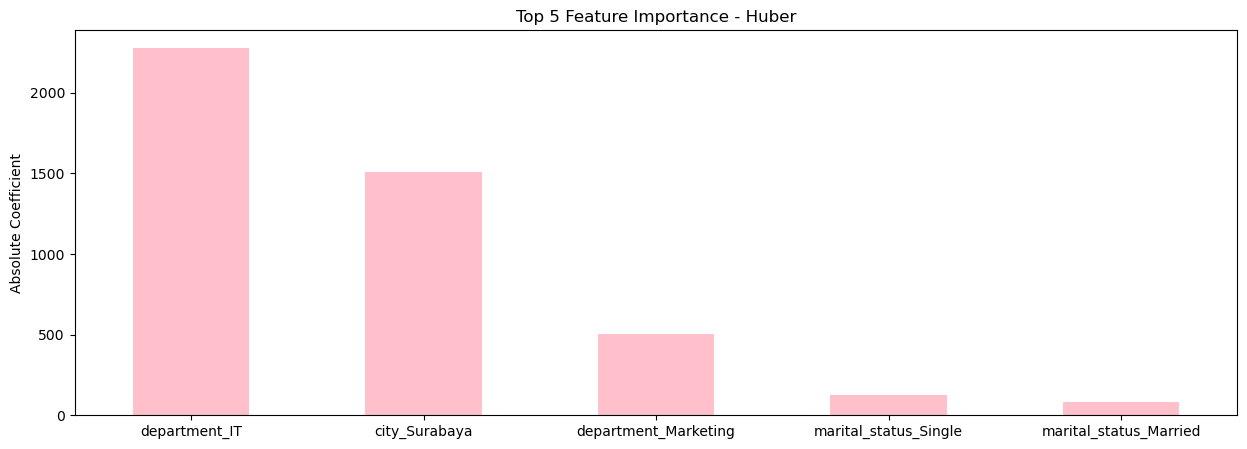

In [47]:
# Feature importance
importance = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)

# Get the top 5 most important features
top5 = importance.head(5)

# Plot the top 5 features
top5.plot(kind='bar', figsize=(15, 5), color='pink')  # Create a bar plot for the top 5 features
plt.title('Top 5 Feature Importance - Huber')  # Set the plot title
plt.ylabel('Absolute Coefficient')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate the x-axis labels to make them horizontal
plt.show()  # Display the plot

**Insight:**
- department_IT has the highest importance, with a significantly larger coefficient (~2,200). This suggests that the department a person belongs to (specifically IT) has a strong influence on the target variable.
- city_Surabaya comes next, with a moderate coefficient (~1,500). This indicates that the city where an individual resides also plays a significant role in determining the outcome.
- department_Marketing has a smaller coefficient (~500), suggesting it's a relatively weaker predictor compared to the IT department.
- marital_status_Single and arital_status_Married have the lowest importance, with coefficients just above 100. This implies that these features have a minimal impact on the model's predictions.

## Save Model
- The best model (Huber Regressor, after hyperparameter tuning) and the preprocessing pipeline (ColumnTransformer ct) are saved using joblib.
- Saving both the model and preprocessing pipeline ensures that future predictions can be made using the exact same transformations and model settings as the ones used during training.

In [48]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'employee_income_prediction.joblib')

['employee_income_prediction.joblib']

In [49]:
# Save column transformer
joblib.dump(ct, 'preprocessing_pipeline.joblib')

['preprocessing_pipeline.joblib']

## Load Model
The saved model and preprocessing pipeline can be loaded from disk using `joblib.load()`.

In [50]:
# Load the saved model
loaded_model = joblib.load('employee_income_prediction.joblib')

## Testing
- The test data is structured to match the input format that the model expects. It includes features such as gender, marital status, city, and other numerical features like age, years of experience, and performance score.
- An example test data is provided, which includes three records with different employee attributes.

In [51]:
# Example test data based on your dataset structure
test_data = pd.DataFrame([
    {
        'gender': 'Male',
        'marital_status': 'Single',
        'city': 'Bangalore',
        'education_level': 'Bachelors',
        'department': 'IT',
        'income_class': 'High',
        'age': 28,
        'years_experience': 3,
        'weekly_hours': 40,
        'bonus_percentage': 10,
        'performance_score': 4.5,
        'overtime_hours': 5,
        'monthly_income': 60000
    },
    {
        'gender': 'Female',
        'marital_status': 'Married',
        'city': 'Pune',
        'education_level': 'Masters',
        'department': 'HR',
        'income_class': 'Medium',
        'age': 30,
        'years_experience': 5,
        'weekly_hours': 42,
        'bonus_percentage': 15,
        'performance_score': 4.2,
        'overtime_hours': 2,
        'monthly_income': 55000
    },
    {
        'gender': 'Male',
        'marital_status': 'Married',
        'city': 'Mumbai',
        'education_level': 'PhD',
        'department': 'R&D',
        'income_class': 'High',
        'age': 40,
        'years_experience': 10,
        'weekly_hours': 45,
        'bonus_percentage': 20,
        'performance_score': 4.8,
        'overtime_hours': 8,
        'monthly_income': 80000
    }
])

# Display the test data
test_data

,gender,marital_status,city,education_level,department,income_class,age,years_experience,weekly_hours,bonus_percentage,performance_score,overtime_hours,monthly_income
0,Male,Single,Bangalore,Bachelors,IT,High,28,3,40,10,4.5,5,60000
1,Female,Married,Pune,Masters,HR,Medium,30,5,42,15,4.2,2,55000
2,Male,Married,Mumbai,PhD,R&D,High,40,10,45,20,4.8,8,80000


## Conclusion

Based on the full modeling pipeline and evaluation metrics, the following conclusions can be drawn regarding the prediction of employee monthly income:

1. **Model Selection**  
   The **Huber Regressor (Standard)** consistently outperforms other models—including CatBoost and its own log-transformed variant—across prioritized metrics: **MedAE**, **MAE**, **R²**, and **MAPE**. Its robustness to outliers and stable generalization make it the most reliable model for minimizing both typical and average prediction errors.

2. **Feature Importance**  
   Coefficient analysis reveals that certain features have a strong influence on salary prediction:
   - `department_IT` and `city_Surabaya` are dominant predictors, associated with significantly higher income levels.
   - Features like `department_Marketing`, `marital_status_Single`, and `marital_status_Married` show minimal impact, suggesting limited predictive value in this context.

3. **Log Transformation**  
   While log transformation slightly improves MedAE and MaxError, it underperforms in MAE, MAPE, and R². The **standard version of Huber Regressor remains superior**, offering more consistent and interpretable results for business use.

4. **Hyperparameter Tuning**  
   Tuning the Huber Regressor yields only marginal improvements in RMSE and R², with negligible gains in other metrics. The default configuration remains competitive and is preferred for its simplicity and stability.

5. **Model Deployment**  
   The final model and preprocessing pipeline have been saved, enabling reproducible predictions and scalable integration into HR and finance workflows.

---

## Recommendations

1. **Compensation Optimization**  
   Use the model to align salary offers with data-driven benchmarks based on department, location, education, and experience—ensuring competitive and fair compensation.

2. **Pay Gap Diagnostics**  
   Identify and address salary inconsistencies among employees with similar profiles. This supports equitable pay practices and strengthens internal trust.

3. **Strategic Budgeting**  
   Leverage accurate salary forecasts for more precise financial planning and resource allocation, helping the organization stay within budget while meeting compensation goals.

4. **Retention Strategy**  
   Detect patterns that may lead to turnover—such as underpaid employees with similar qualifications—and proactively adjust pay structures to retain top talent.

5. **Data-Driven HR Decisions**  
   Use model insights to guide promotions, raises, and bonus allocations. Focusing on the most impactful predictors ensures HR decisions are fair, transparent, and aligned with performance.

---

In summary, deploying the **Huber Regressor (Standard)** equips the business with a robust, interpretable, and scalable solution for predicting employee income—supporting smarter compensation strategies and more equitable workforce planning.